In [77]:
import numpy as np
from scipy.linalg import lu
import sympy as sp
from PIL import Image
import matplotlib.pyplot as plt
import cv2

In [78]:
#1.

#(a)

# 將 A1 矩陣和 b1 向量定義成 numpy array

A1 = np.array([[3, 2, 0], [1, -1, 0], [0, 5, 1]])

b1 = np.array([2, 4, 1])

print(f"A1 = {A1}", f"b1 = {b1}", sep="\n")

#(b)

# 利用 np.linalg 解出 [x1, x2, x3]

x1 = np.linalg.solve(A1, b1)

print(f"x1 = {x1}")

# 得到 x1 作為解

#(c)

# 利用 np.linalg 求出反矩陣

A1inv = np.linalg.inv(A1)

# 將反矩陣和 b1 向量做 dot product
# 此相當於 A1^(-1) * A1 * x1 = A1^(-1) * b1
# x1 = A1^(-1) * b1

x2 = np.dot(A1inv, b1)

# 使用 numpy 函式比較 x1 及 x2 得到兩者相等

equal = np.allclose(x1, x2)

print(f" x1 equals to x2 : {equal}")

#(d)

# 使用 scipy 函式得出 A1 的 LU 矩陣

P, L, U = lu(A1)

print(f"L = {L}", f"U = {U}", sep="\n")

A1 = [[ 3  2  0]
 [ 1 -1  0]
 [ 0  5  1]]
b1 = [2 4 1]
x1 = [ 2. -2. 11.]
 x1 equals to x2 : True
L = [[ 1.          0.          0.        ]
 [ 0.          1.          0.        ]
 [ 0.33333333 -0.33333333  1.        ]]
U = [[3.         2.         0.        ]
 [0.         5.         1.        ]
 [0.         0.         0.33333333]]


In [79]:
#2.

#(a)

# 將 A2 矩陣 b2 向量定義成 numpy array

A2 = np.array([[5, -2, 2, 1], [4, -3, 4, 2], [4, -6, 7, 4]])

b2 = [1, 2, 3]

# 使用 numpy 函式將向量 b2 作為 A2 的最後一個 column 完成增廣矩陣

M = np.column_stack((A2, b2))

print(f"M = {M}")

#(b)

# 將 A2 轉為 sympy 矩陣

A2 = sp.Matrix(A2)

# 使用 sympy 函式求出 A2 的 rref

rref_matrix, pivot_columns = A2.rref()

print(f"rref = {np.array(rref_matrix)}")

M = [[ 5 -2  2  1  1]
 [ 4 -3  4  2  2]
 [ 4 -6  7  4  3]]
rref = [[1 0 0 -1/15]
 [0 1 0 -2/5]
 [0 0 1 4/15]]


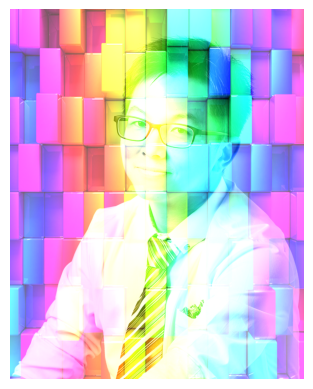

In [80]:
# 讀取圖片，並轉換成 numpy array

img1 = np.array(Image.open("2019CYatAIA_s.jpg"))
img2 = np.array(Image.open("BlogFeatureColor.jpg"))

# 調整 img2 的大小以匹配 img1

img2_resized = cv2.resize(img2, (img1.shape[1], img1.shape[0]))

# 將兩張圖片相加

img_added = cv2.add(img1, img2_resized)

# 使用 matplotlib 顯示圖片

plt.imshow(cv2.cvtColor(img_added, cv2.COLOR_BGR2RGB))
plt.axis("off")
plt.show()



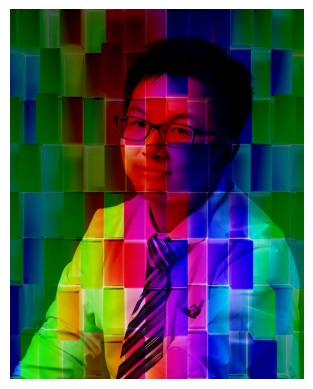

In [81]:
#將兩張圖片相減

img_sub = cv2.subtract(img1, img2_resized)

# 使用 matplotlib 顯示圖片

plt.imshow(img_sub)
plt.axis("off")
plt.show()

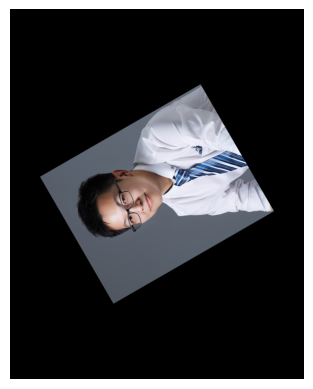

In [82]:
# 讀取圖片

img = cv2.imread("2019CYatAIA_s.jpg")

# 獲取圖片維度和中心點

(h, w) = img.shape[:2]
(center_x, center_y) = (w // 2, h // 2)

# 生成旋轉矩陣，旋轉 120 度，縮放 0.5 倍

rotation_matrix = cv2.getRotationMatrix2D((center_x, center_y), 120, 0.5)

# 進行旋轉

rotated_img = cv2.warpAffine(img, rotation_matrix, (w, h))

# 將 BGR 圖像轉換為 RGB 格式，以便在 matplotlib 中正確顯示

rotated_img_rgb = cv2.cvtColor(rotated_img, cv2.COLOR_BGR2RGB)

# 使用 matplotlib 顯示圖片

plt.imshow(rotated_img_rgb)
plt.axis('off')
plt.show()


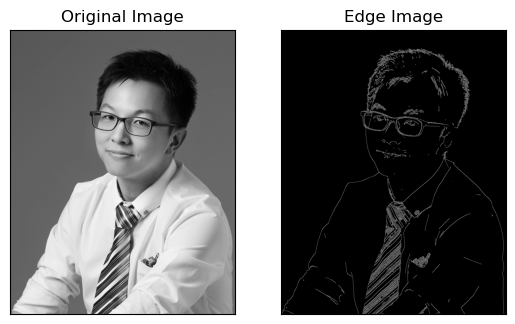

In [83]:
# 參考自http://surl.li/saxfs

# 以灰階讀取圖片

img = cv2.imread("2019CYatAIA_s.jpg", 0)

# 使用Canny Edge Detenction

edges = cv2.Canny(img,100,200)

# 使用 matplotlib 將處理前後的圖片作為一行兩列的佈局顯示，使用camp參數確保圖片顯示為灰階，並加上標題

plt.subplot(121),plt.imshow(img,cmap = 'gray')
plt.title('Original Image'), plt.xticks([]), plt.yticks([])
plt.subplot(122),plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

plt.show()